In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from pmdarima import auto_arima

from joblib import dump


In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv")

In [5]:
df["date"] = pd.to_datetime(df.date)
df = df.set_index("date")
sales_ts = df["sales"]
sales_ts.head()

date
2022-09-03 17:10:08.079328    55.292157
2022-09-04 17:10:08.079328    53.803211
2022-09-05 17:10:08.079328    58.141693
2022-09-06 17:10:08.079328    64.530899
2022-09-07 17:10:08.079328    66.013633
Name: sales, dtype: float64

- This is a 1D tensor (vector) meaning it has 1 element corresponding to a data point represting the sales value for a specific day. 

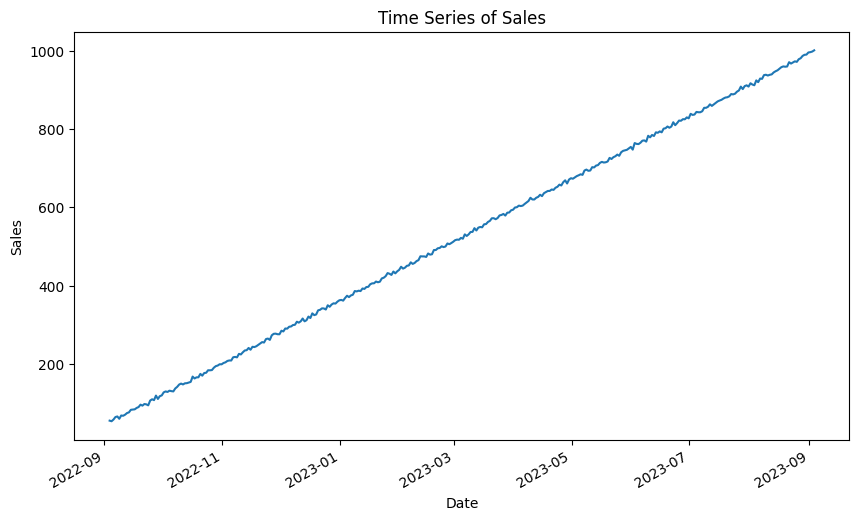

In [6]:
sales_ts.plot(figsize=(10, 6))
plt.title('Time Series of Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


- We see a positive linear trend showing a gradual growth pattern where the sales values in the time series consistently and steadily increase over time. 
- The values in the timer series do not exhibit fluctuations nor do the values vary around a centra point. So far, we do not see any periods of high volatility where the values change rapidly followed by periods of stability or unexpected jumps or irregularities. 

In [7]:
def test_stationarity(timeseries):
    print("Dickey-Fuller test results:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(sales_ts)

Dickey-Fuller test results:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

- The test statistic is greater than the critical values, further supporting the idea that the time series is likely non-stationary

In [8]:
decomposition = seasonal_decompose(sales_ts)
decomposition

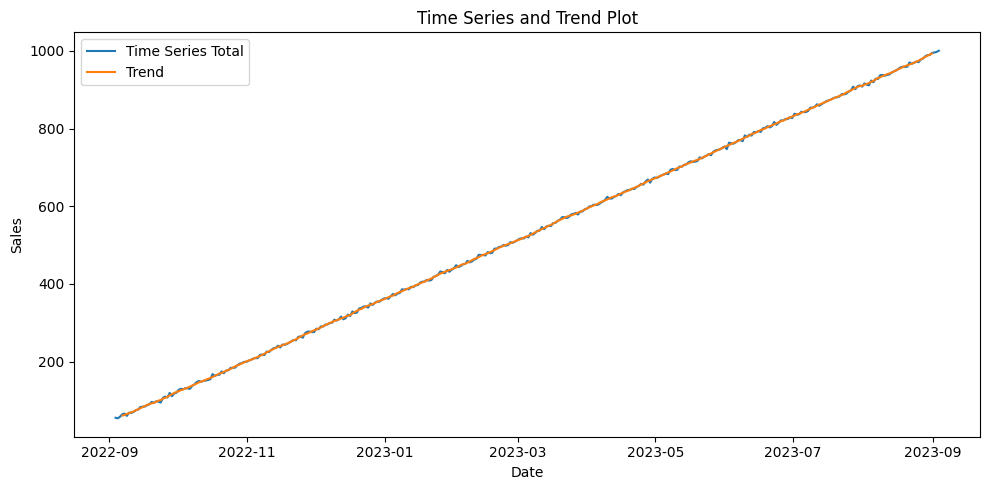

In [9]:
trend = decomposition.trend
fix, ax= plt.subplots(figsize = (10, 5))

ax.plot(sales_ts, label='Time Series Total')

ax.plot(trend, label='Trend')

ax.set_xlabel('Date')
ax.set_ylabel('Sales')
ax.set_title('Time Series and Trend Plot')
ax.legend()

plt.tight_layout()
plt.show()

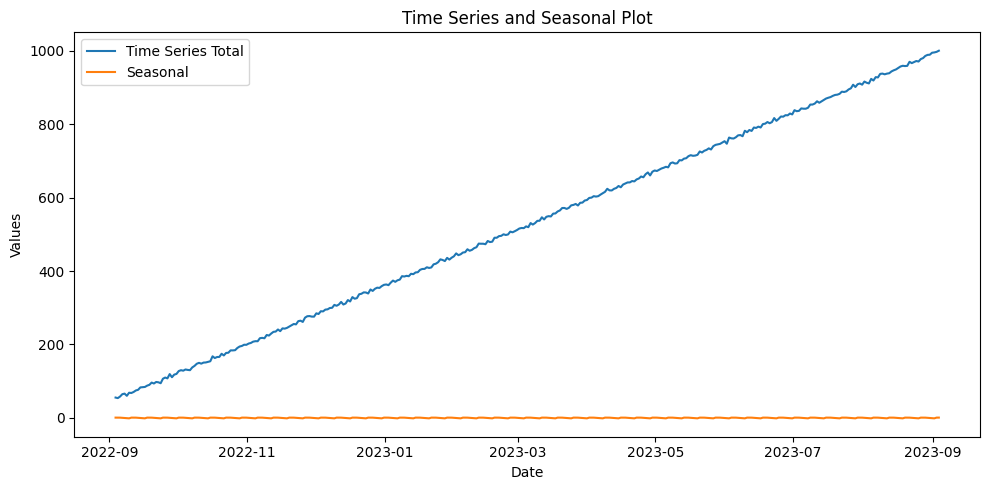

In [10]:
seasonal = decomposition.seasonal 

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(sales_ts, label='Time Series Total')

ax.plot(seasonal, label='Seasonal')

ax.set_xlabel('Date')
ax.set_ylabel('Values')
ax.set_title('Time Series and Seasonal Plot')
ax.legend()

plt.tight_layout()
plt.show()

In [11]:
def test_stationarity(timeseries):
    print("Dickey-Fuller Results:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(sales_ts)

Dickey-Fuller Results:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

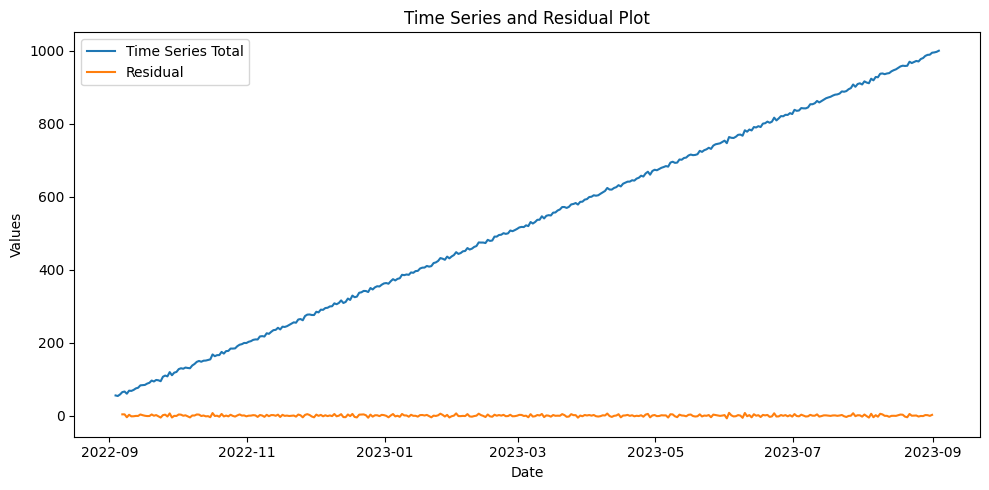

In [12]:
residual = decomposition.resid

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(sales_ts, label='Time Series Total')

ax.plot(residual, label='Residual')

ax.set_xlabel('Date')
ax.set_ylabel('Values')
ax.set_title('Time Series and Residual Plot')
ax.legend()

plt.tight_layout()
plt.show()


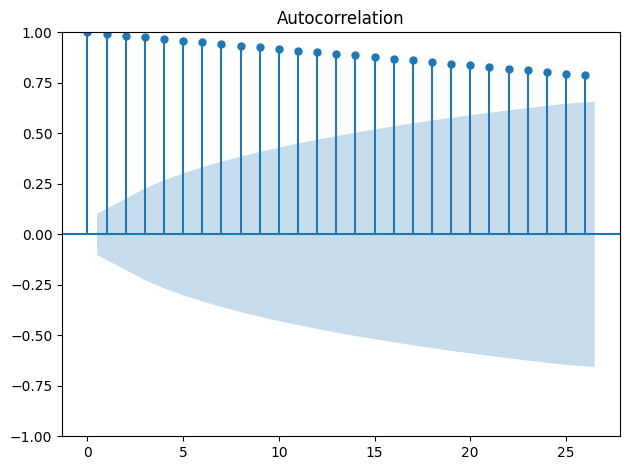

In [13]:
plot_acf(sales_ts)

plt.tight_layout()

plt.show()

In [14]:
model = auto_arima(sales_ts, seasonal = False, trace = True, m = 7)

/home/vscode/.local/lib/python3.11/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1843.274, Time=0.77 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2096.542, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1970.972, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1839.586, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2209.657, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1839.552, Time=0.29 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1841.532, Time=0.75 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1843.586, Time=0.49 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1839.607, Time=0.61 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1922.648, Time=0.50 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.41 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 4.110 seconds


In [15]:
forecast = model.predict(20)
forecast

2023-09-04 17:10:08.079328    1002.158148
2023-09-05 17:10:08.079328    1004.831669
2023-09-06 17:10:08.079328    1007.423289
2023-09-07 17:10:08.079328    1010.021630
2023-09-08 17:10:08.079328    1012.619419
2023-09-09 17:10:08.079328    1015.217254
2023-09-10 17:10:08.079328    1017.815084
2023-09-11 17:10:08.079328    1020.412915
2023-09-12 17:10:08.079328    1023.010746
2023-09-13 17:10:08.079328    1025.608577
2023-09-14 17:10:08.079328    1028.206409
2023-09-15 17:10:08.079328    1030.804240
2023-09-16 17:10:08.079328    1033.402071
2023-09-17 17:10:08.079328    1035.999902
2023-09-18 17:10:08.079328    1038.597733
2023-09-19 17:10:08.079328    1041.195564
2023-09-20 17:10:08.079328    1043.793395
2023-09-21 17:10:08.079328    1046.391226
2023-09-22 17:10:08.079328    1048.989057
2023-09-23 17:10:08.079328    1051.586888
Freq: D, dtype: float64

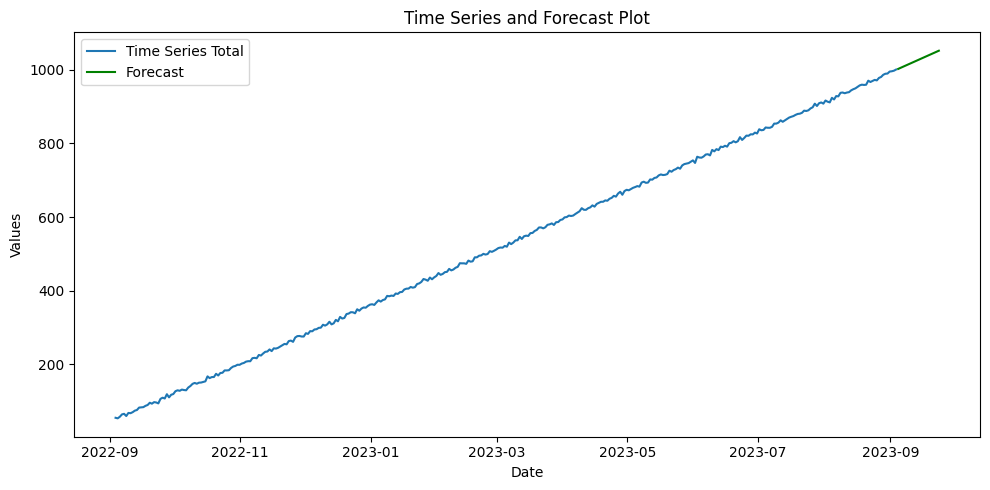

In [16]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(sales_ts, label='Time Series Total')

ax.plot(forecast, label='Forecast', color='green')

ax.set_xlabel('Date')
ax.set_ylabel('Values')
ax.set_title('Time Series and Forecast Plot')
ax.legend()

plt.tight_layout()
plt.show()


In [17]:
dump(model, open("arima_model.sav", "wb"))